In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#데이터 부러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [98]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [100]:
#결측치 확인
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [101]:
#결측치 처리
#전체 결측치 처리
#Age -> 평균값으로 채우기
#RoomService, FoodCourt, ShoppingMall,Spa,VRDeck -> 0으로 채우기
#Name -> Jane Doe로 채우기

#   TEST 결측치 처리 : Home/Cryo/Destination/VIP -> 지우기





train = train.dropna(subset=['HomePlanet', 'Destination','CryoSleep', 'VIP','Cabin'] )


train.loc[train['Age'] !=train['Age'],'Age'] = train['Age'].mean()
test.loc[test['Age'] !=test['Age'],'Age'] = test['Age'].mean()

train=train.fillna({'RoomService':0,'FoodCourt':0,'ShoppingMall':0,'Spa':0,'VRDeck':0})
test=test.fillna({'RoomService':0,'FoodCourt':0,'ShoppingMall':0,'Spa':0,'VRDeck':0})

train['Name']=train['Name'].fillna('Jane Doe')
test['Name']=test['Name'].fillna('Jane Doe')

In [102]:
#풀려는 것
#HomePlanet 에서 Destination까지 Transported가 되었는지 예측하는 것

#1. 일단 시작지점에 따라 제대로 Transported를 한 비율을 살펴보기
#2. 목적 지점에 따라 제대로 Transported를 한 비율을 살펴보기
#3. 동면에 따른 Transported 비율 
#4. 나이에 따른 Transported 비율 

#5. 동면을 했다는 건 무엇을 뜻하는 걸까?
#   1) 목적지까지의 거리가 멀거나
#   2) 돈을 많이 쓰거나(VIP)
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [103]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
dtype: int64

In [104]:
#1. 시작지점에 따른 Transported 비율 살펴보기
train[['HomePlanet','Transported']].groupby(by=['HomePlanet']).mean()
#출발지역은 총 3군데이며 유로파에서 출발한 승객이 제대로 Transported함

,Transported
HomePlanet,
Earth,0.424827
Europa,0.659607
Mars,0.519651


In [31]:
#2. 도착지점에 따른 Transported 비율 살펴보기
train[['Destination','Transported']].groupby(by=['Destination']).mean()
#도착지점도 3군데이며 55Cancrie로 가는 것이 가장 잘 도착함

,Transported
Destination,
55 Cancri e,0.609518
PSO J318.5-22,0.506207
TRAPPIST-1e,0.470402


In [32]:
#3. 동면에 따른 Transported 비율
train[['CryoSleep','Transported']].groupby(by=['CryoSleep']).mean()
#동면을 하였을 때 높은 확률로 Transported 됨

,Transported
CryoSleep,
False,0.329513
True,0.816075


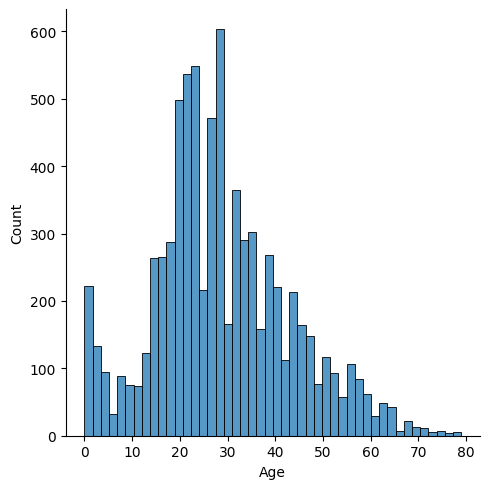

In [33]:
#4. 승객들의 나이 분포
sns.displot(x=train['Age'])


In [105]:
#선형회귀 및 관계도(corr)을 사용하기 위해 test/train의 string 데이터(출발/목적)를 int로 변환하자
train['Destination']=train['Destination'].replace({'55 Cancri e':0,'TRAPPIST-1e':1, 'PSO J318.5-22':2 })
test['Destination']=test['Destination'].replace({'55 Cancri e':0,'TRAPPIST-1e':1, 'PSO J318.5-22':2 })
train['Destination'].value_counts()
test['Destination'].value_counts()

Destination
1.0    2956
0.0     841
2.0     388
Name: count, dtype: int64

In [106]:
train['HomePlanet']=train['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2})
test['HomePlanet']=test['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2})
train['HomePlanet'].value_counts()
test['HomePlanet'].value_counts()

HomePlanet
1.0    2263
0.0    1002
2.0     925
Name: count, dtype: int64

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,1.0,1,G/3/S,1.0,27.0,0,0.0,0.0,0.0,0.0,0.0,6.0,3,S
1,1.0,0,F/4/S,1.0,19.0,0,0.0,9.0,0.0,2823.0,0.0,5.0,4,S
2,0.0,1,C/0/S,0.0,31.0,0,0.0,0.0,0.0,0.0,0.0,2.0,0,S
3,0.0,0,C/1/S,1.0,38.0,0,0.0,6652.0,0.0,181.0,585.0,2.0,1,S
4,1.0,0,F/5/S,1.0,20.0,0,10.0,0.0,635.0,0.0,0.0,5.0,5,S


In [107]:
#True/False도 1/0으로 변환(Cryosleep, VIP)
train[['CryoSleep', 'VIP','Transported']] = (train[['CryoSleep', 'VIP','Transported']] == True).astype(int)
test[['CryoSleep', 'VIP']] = (test[['CryoSleep', 'VIP']] == True).astype(int)

train[['deck', 'num','side']] = train['Cabin'].str.split('/', expand=True)
train=train.drop(['Cabin'],axis=1)

#Cabin 나눠서 보기
test[['deck', 'num','side']] = test['Cabin'].str.split('/', expand=True)
test=test.drop(['Cabin'],axis=1)


#이름과 Cabin 지우기 
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['PassengerId','Name'],axis=1)


In [37]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,1,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,1,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [38]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,1.0,1,1.0,27.0,0,0.0,0.0,0.0,0.0,0.0,G,3,S
1,1.0,0,1.0,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0.0,1,0.0,31.0,0,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0.0,0,1.0,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,1.0,0,1.0,20.0,0,10.0,0.0,635.0,0.0,0.0,F,5,S


In [108]:
#cabind의 deck의 문자열을 회귀 돌리기 위해 int로 변환하기
train['deck']=train['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
test['deck']=test['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})


In [109]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,P
1,1,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,S
2,0,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,S
3,0,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,S
4,1,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,S


In [110]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,1.0,1,1.0,27.0,0,0.0,0.0,0.0,0.0,0.0,6.0,3,S
1,1.0,0,1.0,19.0,0,0.0,9.0,0.0,2823.0,0.0,5.0,4,S
2,0.0,1,0.0,31.0,0,0.0,0.0,0.0,0.0,0.0,2.0,0,S
3,0.0,0,1.0,38.0,0,0.0,6652.0,0.0,181.0,585.0,2.0,1,S
4,1.0,0,1.0,20.0,0,10.0,0.0,635.0,0.0,0.0,5.0,5,S


In [111]:
#num side는 어떤 기호가 있지?
test['side'].value_counts()
#P,S
train['side']=train['side'].replace({'P':0, 'S':1})
test['side']=test['side'].replace({'P':0, 'S':1})


In [112]:
#최종 돌릴 것
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,1,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,0,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,0,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,1,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


In [113]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,1.0,1,1.0,27.0,0,0.0,0.0,0.0,0.0,0.0,6.0,3,1.0
1,1.0,0,1.0,19.0,0,0.0,9.0,0.0,2823.0,0.0,5.0,4,1.0
2,0.0,1,0.0,31.0,0,0.0,0.0,0.0,0.0,0.0,2.0,0,1.0
3,0.0,0,1.0,38.0,0,0.0,6652.0,0.0,181.0,585.0,2.0,1,1.0
4,1.0,0,1.0,20.0,0,10.0,0.0,635.0,0.0,0.0,5.0,5,1.0


In [125]:
#train.isna().sum()
test = test.interpolate(subset=['HomePlanet', 'Destination','deck','num','side'] )
test[test['num'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
18,0.0,0,1.0,29.0,0,0.0,7708.0,243.0,569.0,343.0,1.0,NaN,1.0
99,1.0,0,1.0,22.0,0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0
135,0.0,1,1.0,47.0,0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,0.5
147,1.0,1,0.0,18.0,0,0.0,0.0,0.0,0.0,0.0,5.5,NaN,0.0
180,2.0,0,1.0,37.0,0,731.0,0.0,517.0,50.0,0.0,5.5,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,0.0,0,1.0,41.0,0,0.0,1998.0,0.0,1023.0,867.0,6.0,NaN,0.5
4248,2.0,1,1.0,24.0,0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,0.0
4249,2.0,1,1.0,17.0,0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,0.0
4258,1.0,1,1.0,14.0,0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,0.0


In [129]:
test = test.interpolate(subset=['HomePlanet', 'Destination','deck','num','side'] )
test=test.fillna(0)
test.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
deck            0
num             0
side            0
dtype: int64

In [130]:
#훈련 진행
#선형 회귀 해보기
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X_train = train.drop(["Transported"],axis=1)
Y_train = train["Transported"]
X_test = test
X_train.shape, Y_train.shape, X_test.shape




((7736, 13), (7736,), (4277, 13))

In [131]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

e:\Workplace\ProgrammersSchool\KDT_AI\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


78.65

In [132]:
#제출하기
result = pd.read_csv('sample_submission.csv')
result["Transported"]=Y_pred
result.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
